In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.optimize as sci
import pandas as pd

In [184]:
sns.set_style('darkgrid')

In [50]:
# function to calculate the portfolio return
def portfolio_returns(weights, mu):
    return weights.T @ mu

In [13]:
# Function for computing standard deviation of portfolio returns
def portfolio_sd(weights, sigma):
    return np.sqrt(np.transpose(weights) @ sigma @ weights)

In [15]:
# Return an array of equal weights that sum to one of dimension length
def get_equal_weights(length):
    return np.array([1 / length] * length)

In [38]:
# load data from FRED
mu = np.array([0.02, 0.06, 0.08, 0.1]) # expected return
sigma = np.array([[0.01, 0.03, 0.2, 0.22],
         [0.03, 0.04, 0.4, 0.5],
         [0.02, 0.4, 0.7, 0.6],
         [0.22, 0.5, 0.6, 0.9]])

In [74]:
mu = np.array([0.02, 0.1]) # expected return
sigma = np.array([[0.4, 0.22],
                  [0.22, 0.85]])

In [151]:
# find for a given level of return the weights that minimize the std of portfolio
#  and store the std 

# as start value for the optimization
equal_weights = get_equal_weights(len(mu))

# each weight needs to be between 0 and 1
bounds = tuple((0, 1) for w in equal_weights)

# two constraints
constraints = (
  {'type': 'eq', 'fun': lambda x:  target - portfolio_returns(x, mu) }, # portfolio return should equal return_target
  {'type': 'eq', 'fun': lambda x: np.sum(x) - 1} # weights must sum to one
)

# Initialize an array of target returns
return_target = np.linspace(
  start = 0.00, 
  stop = 0.1,
  num = 100
)
# empty list to store the results
std = []
# For loop to minimize objective function
min_port_risk = np.inf
min_ret = np.inf
for target in return_target:
  opt_result = sci.minimize(
    # Objective function
    fun = portfolio_sd, 
    # start with equal weights 
    x0 = equal_weights, 
    args = sigma,
    method = 'SLSQP',
    bounds = bounds, 
    constraints = constraints
    )
  # Extract the objective value and append it to the output container
  if (opt_result['x'][0]>0) and (opt_result['x'][1]<1):
    std.append(opt_result['fun'])
    if opt_result['fun'] < min_port_risk: 
      min_port_risk = opt_result['fun']
      min_port_ret = target
  else: 
    std.append(std[-1])


In [134]:
min_port_risk, min_port_ret

(0.6000172173820262, 0.03737373737373737)

In [168]:
# find efficient frontier
eff_front_x = []
eff_front_y = []
for i in range(len(std)):
    if (std[i] > min_port_risk) and (return_target[i] > min_port_ret):
        eff_front_x.append(std[i])
        eff_front_y.append(return_target[i])


In [153]:
# delete first 10 entries as the portfolio have identical risk
std = np.array(std)
std = std[20:]
return_target = np.array(return_target)
return_target= return_target[20:]

In [154]:
# find max Sharpe ratio
max_ratio = 0
for i in range(len(std)):
    if return_target[i]/std[i] > max_ratio:
        max_ratio = return_target[i] /std[i]
        idx_max = i
idx_max, max_ratio

(79, 0.10846522894676348)

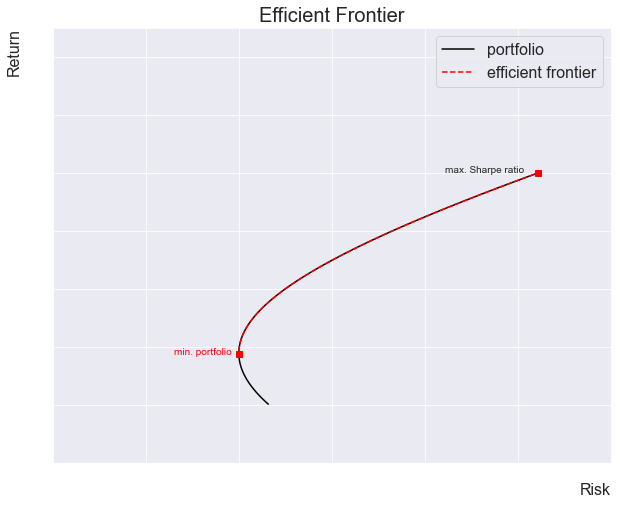

In [189]:

plt.figure(figsize=(10,8))
plt.plot(std,return_target, color = 'black', label='portfolio')
plt.plot(eff_front_x,eff_front_y, '--', color = 'red', label='efficient frontier')
#plt.plot(std, utility_curve, color = 'red', label='max. utility')
#plt.plot(std, utility_curve_second, color = 'red', alpha=0.2, linestyle='dashed')
#plt.plot(std, utility_curve_third, color = 'red', alpha=0.2, linestyle='dashed')
#plt.hlines(y_axis, 0, 1, colors='black', linewidth = 0.8, linestyles='dashed', label='optimal return')
#plt.vlines(1, 0, y_axis, colors='black', linewidth = 0.8, linestyles='dashed')
#plt.xticks([])
plt.xticks(color='w')
plt.yticks(color='w')
#plt.yticks([])
#plt.scatter(0, 3, color='red', zorder=5)
plt.text(min_port_risk-0.07, min_port_ret, 'min. portfolio', color='red')
plt.plot(min_port_risk, min_port_ret, 's', color='red')
plt.text(std[idx_max]-0.1, return_target[idx_max], 'max. Sharpe ratio')
plt.plot(std[idx_max], return_target[idx_max], 's', color = 'red')
#plt.text(-0.15, y_axis, r'$ \ r_{optimum}$', color='black')
#plt.text(1, 1.9, r'$ \sigma_{optimum}$', color='black')
# market portfolio
#plt.hlines(y_axis + 0.77, 0, 1.5, colors='black', linewidth = 0.8, linestyles='dashed', label='market port. return')
#plt.vlines(1.5, 0, y_axis +0.77, colors='black', linewidth = 0.8, linestyles='dashed')
#plt.text(-0.2, y_axis +0.77, r'$ \ r_{market port.}$', color='black')
#plt.text(1.5, 1.9, r'$ \sigma_{market port.}$', color='black')
plt.xlim(0.4, 1)
plt.ylim(0, 0.15)
plt.xlabel('Risk', loc='right',fontsize=16)
plt.ylabel('Return', loc='top', fontsize=16)
plt.title('Efficient Frontier', fontsize=20)
plt.legend(fontsize=16)
plt.show()